### Reading in the data and loading packages

In [207]:
# Import packages
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
from vega_datasets import data

In [208]:
# Read in clean data
df = pd.read_csv("../data/clean_data.csv")
df.head()

,Decision,State,GPA,WorkExp,TestScore,WritingScore,Gender,VolunteerLevel
0,Waitlist,Alabama,3.41,1.2,868,85,0,0
1,Admit,California,3.90,6.7,962,100,1,0
2,Admit,California,3.88,1.5,967,95,1,5
3,Admit,California,3.70,1.2,969,94,1,2
4,Admit,California,3.70,1.4,966,94,1,0


### EDA Visuals

In [209]:
admitted_df = df[df["Decision"] == "Admit"]
def middle50(data, colname):
    lower_quantile = data[colname].quantile(0.25)
    upper_quantile = data[colname].quantile(0.75)
    return lower_quantile, upper_quantile
print("GPA Middle 50%:", middle50(admitted_df, "GPA"))
print("WorkExp Middle 50%:", middle50(admitted_df, "WorkExp"))
print("TestScore Middle 50%:", middle50(admitted_df, "TestScore"))
print("WritingScore Middle 50%:", middle50(admitted_df, "WritingScore"))
print("Volunteer Level Middle 50%:", middle50(admitted_df, "VolunteerLevel"))

GPA Middle 50%: (3.66, 3.87)
WorkExp Middle 50%: (1.0, 2.2)
TestScore Middle 50%: (965.0, 969.0)
WritingScore Middle 50%: (91.0, 97.0)
Volunteer Level Middle 50%: (1.0, 4.0)


In [210]:
print(admitted_df[admitted_df["Gender"] == 0].shape[0]/29*100)
print(admitted_df[admitted_df["Gender"] == 1].shape[0]/29*100)

44.827586206896555
55.172413793103445


In [211]:
print(df["GPA"].mean())
print(df["WorkExp"].mean())
print(df["TestScore"].mean())
print(df["WritingScore"].mean())
print(df["VolunteerLevel"].mean())
print("------")
print(df["GPA"].median())
print(df["WorkExp"].median())
print(df["TestScore"].median())
print(df["WritingScore"].median())
print(df["VolunteerLevel"].median())
print("------")
print(df["GPA"].max())
print(df["WorkExp"].max())
print(df["TestScore"].max())
print(df["WritingScore"].max())
print(df["VolunteerLevel"].max())
print("------")
print(df["GPA"].min())
print(df["WorkExp"].min())
print(df["TestScore"].min())
print(df["WritingScore"].min())
print(df["VolunteerLevel"].min())

3.4965
2.1475
870.0875
81.6125
2.4625
------
3.54
1.55
868.0
83.5
2.0
------
3.93
9.2
969
100
5
------
2.34
0.0
751
1
0


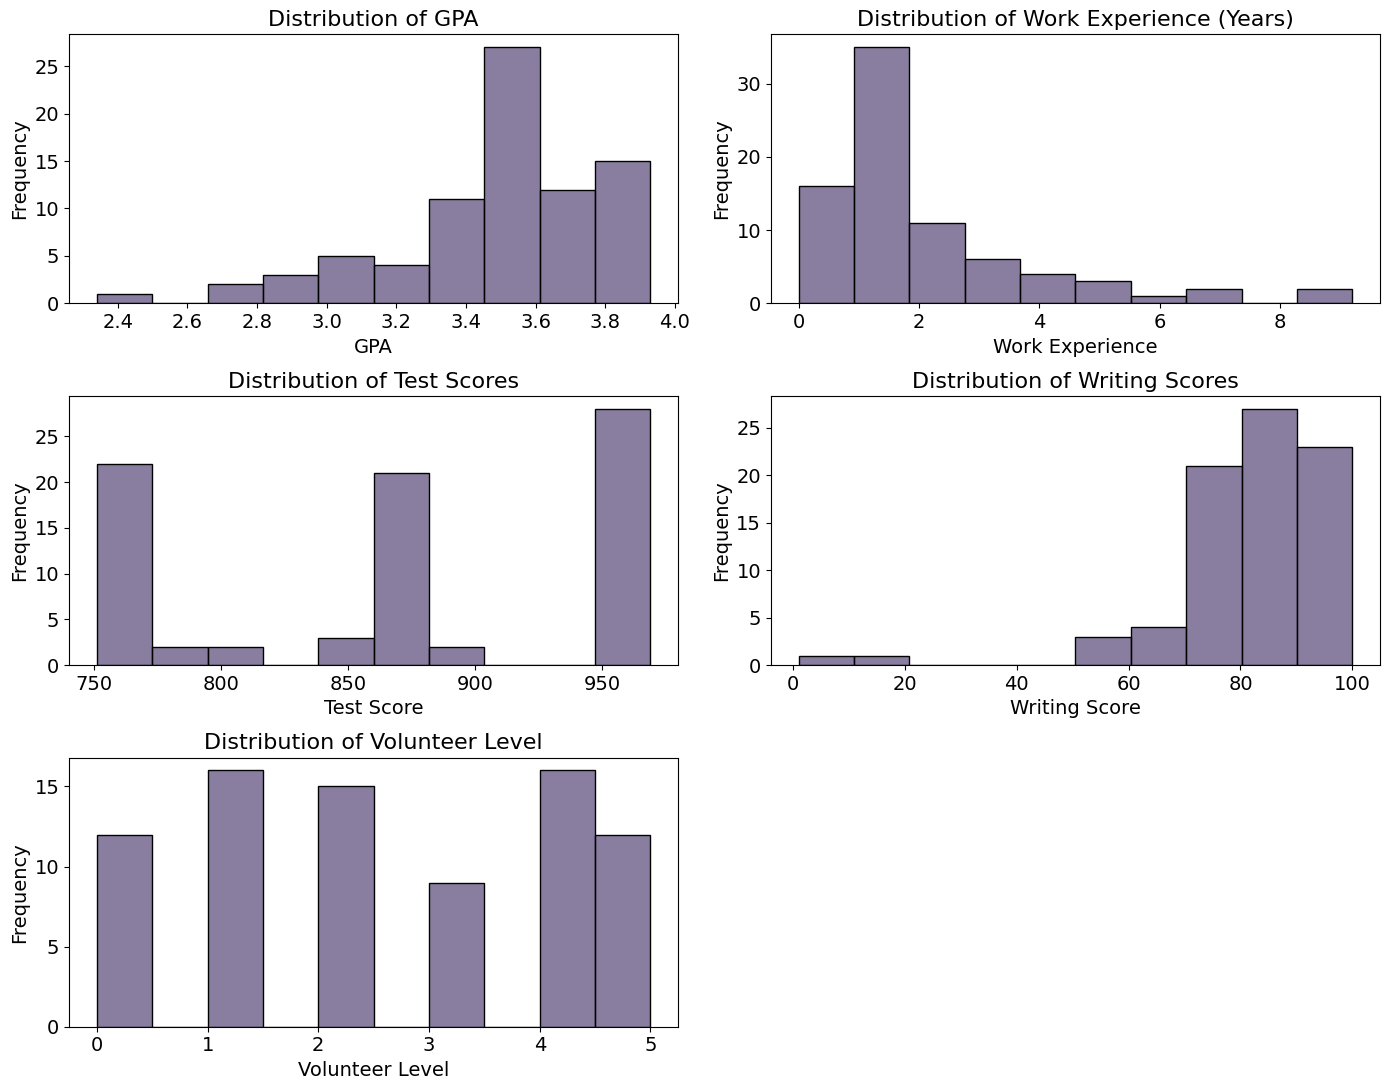

In [212]:
# Histograms of columns to double check for outliers
fig, axes = plt.subplots(3, 2, figsize = (14,11))
sns.histplot(data = df, x = "GPA", bins = 10, kde = False, color = "#635380", edgecolor = "black", ax = axes[0, 0])
axes[0, 0].set_title("Distribution of GPA", fontsize = 16)
axes[0, 0].tick_params(axis = "both", labelsize = 14)
axes[0, 0].set_xlabel("GPA", fontsize = 14)
axes[0, 0].set_ylabel("Frequency", fontsize = 14)

sns.histplot(data = df, x = "WorkExp", bins = 10, kde = False, color = "#635380", edgecolor = "black", ax = axes[0, 1])
axes[0, 1].set_title("Distribution of Work Experience (Years)", fontsize = 16)
axes[0, 1].tick_params(axis = "both", labelsize = 14)
axes[0, 1].set_xlabel("Work Experience", fontsize = 14)
axes[0, 1].set_ylabel("Frequency", fontsize = 14)

sns.histplot(data = df, x = "TestScore", bins = 10, kde = False, color = "#635380", edgecolor = "black", ax = axes[1, 0])
axes[1, 0].set_title("Distribution of Test Scores", fontsize = 16)
axes[1, 0].tick_params(axis = "both", labelsize = 14)
axes[1, 0].set_xlabel("Test Score", fontsize = 14)
axes[1, 0].set_ylabel("Frequency", fontsize = 14)

sns.histplot(data = df, x = "WritingScore", bins = 10, kde = False, color = "#635380", edgecolor = "black", ax = axes[1, 1])
axes[1, 1].set_title("Distribution of Writing Scores", fontsize = 16)
axes[1, 1].tick_params(axis = "both", labelsize = 14)
axes[1, 1].set_xlabel("Writing Score", fontsize = 14)
axes[1, 1].set_ylabel("Frequency", fontsize = 14)

sns.histplot(data = df, x = "VolunteerLevel", bins = 10, kde = False, color = "#635380", edgecolor = "black", ax = axes[2, 0])
axes[2, 0].set_title("Distribution of Volunteer Level", fontsize = 16)
axes[2, 0].tick_params(axis = "both", labelsize = 14)
axes[2, 0].set_xlabel("Volunteer Level", fontsize = 14)
axes[2, 0].set_ylabel("Frequency", fontsize = 14)

fig.delaxes(axes[2, 1])
plt.tight_layout()
plt.show()
fig.savefig("../website/images/variable_histograms.png")

### Investigating gender ratios

/var/folders/_p/d81k_b_93575z7h2220jh4cr0000gn/T/ipykernel_16441/1875275667.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




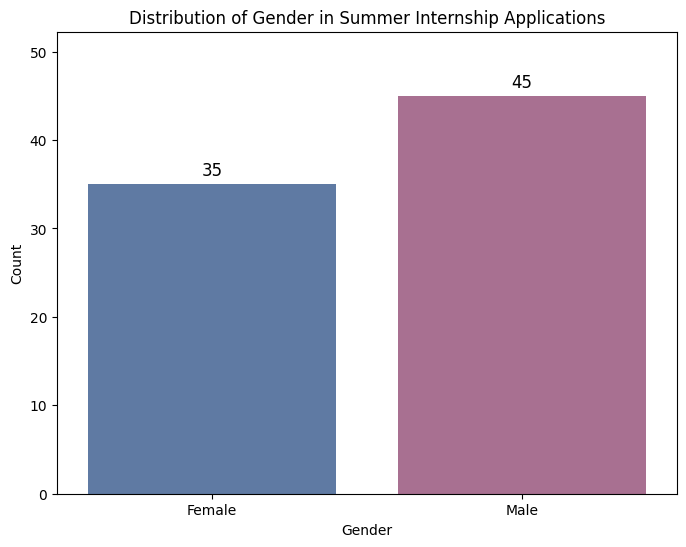

In [213]:
# Bar Chart of Gender Distribution
df["Gender"] = df["Gender"].replace({0: "Female"})
df["Gender"] = df["Gender"].replace({1: "Male"})

fig, ax = plt.subplots(figsize = (8, 6))
ax = sns.countplot(x = "Gender", data = df, palette = ["#5478AE", "#B16792"])

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = "center", va = "center", xytext = (0, 10), textcoords = "offset points", fontsize = 12, color = "black")

ax.set_ylim(0, ax.get_ylim()[1] + 5)

plt.title("Distribution of Gender in Summer Internship Applications")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()
fig.savefig("../website/images/gender_applications_barplot.png")

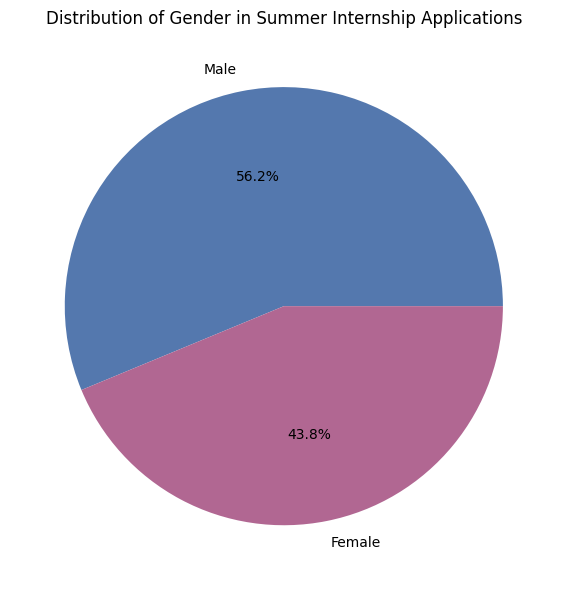

In [214]:
# Pie Chart of Gender Distribution
gender_counts = df['Gender'].value_counts()
gender_counts = pd.DataFrame(gender_counts).reset_index()
gender_counts.columns = ["Gender", "Count"]
gender_counts['Percentage'] = gender_counts['Count'] / gender_counts['Count'].sum()

fig, ax = plt.subplots(figsize = (6, 6))
ax.pie(gender_counts["Percentage"], labels = gender_counts["Gender"], autopct = '%.1f%%', colors = ["#5478AE", "#B16792"])
ax.set_title("Distribution of Gender in Summer Internship Applications")
plt.tight_layout()
plt.show()
fig.savefig("../website/images/gender_applications_piechart.png")

In [215]:
gender_counts_by_state_reject

,Gender,State,count
0,Female,Florida,12
1,Female,Colorado,5
2,Female,Utah,2
3,Female,Virginia,2
4,Female,Alabama,1
5,Male,Florida,12
6,Male,Colorado,5
7,Male,California,3
8,Male,Utah,3
9,Male,Virginia,2


In [216]:
## PREPPING DATA FOR VISUALS
gender_counts_by_state_all = df.groupby("Gender")["State"].value_counts().reset_index()
females_all = gender_counts_by_state_all[gender_counts_by_state_all["Gender"] == "Female"]
males_all = gender_counts_by_state_all[gender_counts_by_state_all["Gender"] == "Male"]

gender_counts_by_state_admitted = df[df["Decision"] == "Admit"].groupby("Gender")["State"].value_counts().reset_index()
females_admit = gender_counts_by_state_admitted[gender_counts_by_state_admitted["Gender"] == "Female"]
males_admit = gender_counts_by_state_admitted[gender_counts_by_state_admitted["Gender"] == "Male"]

gender_counts_by_state_reject = df[df["Decision"] != "Admit"].groupby("Gender")["State"].value_counts().reset_index()
females_reject = gender_counts_by_state_reject[gender_counts_by_state_reject["Gender"] == "Female"]
males_reject = gender_counts_by_state_reject[gender_counts_by_state_reject["Gender"] == "Male"]


all_states_male = pd.DataFrame({"State": df.State.unique(), "count": 0, "Gender": "Male"})
all_states_female = pd.DataFrame({"State": df.State.unique(), "count": 0, "Gender": "Female"})

males_all = pd.merge(all_states_male, males_all, on = "State", how = "left").fillna(0)
males_all = males_all[["State", "count_y", "Gender_x"]]
males_all.columns = ["State", "count", "Gender"]
males_all["count"] = males_all["count"].astype(int)
females_all = pd.merge(all_states_female, females_all, on = "State", how = "left").fillna(0)
females_all = females_all[["State", "count_y", "Gender_x"]]
females_all.columns = ["State", "count", "Gender"]
females_all["count"] = females_all["count"].astype(int)

males_admit = pd.merge(all_states_male, males_admit, on = "State", how = "left").fillna(0)
males_admit = males_admit[["State", "count_y", "Gender_x"]]
males_admit.columns = ["State", "count", "Gender"]
males_admit["count"] = males_admit["count"].astype(int)
males_reject = pd.merge(all_states_male, males_reject, on = "State", how = "left").fillna(0)
males_reject = males_reject[["State", "count_y", "Gender_x"]]
males_reject.columns = ["State", "count", "Gender"]
males_reject["count"] = males_reject["count"].astype(int)

females_admit = pd.merge(all_states_female, females_admit, on = "State", how = "left").fillna(0)
females_admit = females_admit[["State", "count_y", "Gender_x"]]
females_admit.columns = ["State", "count", "Gender"]
females_admit["count"] = females_admit["count"].astype(int)
females_reject = pd.merge(all_states_female, females_reject, on = "State", how = "left").fillna(0)
females_reject = females_reject[["State", "count_y", "Gender_x"]]
females_reject.columns = ["State", "count", "Gender"]
females_reject["count"] = females_reject["count"].astype(int)


In [217]:
# Source: https://www.geeksforgeeks.org/how-to-create-a-population-pyramid-using-plotly-in-python/

## DEFINING FUNCTIONS FOR VISUALS
def create_bar_trace(y, x, name, orientation, marker_color):
    trace = go.Bar(y = y, x = x, name = name, orientation = orientation, marker_color = marker_color)
    return trace

def add_data_labels_female(fig, y, x, sep):
    for i, value in enumerate(x):
        fig.add_annotation(dict(x = value+sep, y = y[i], text = str(value), showarrow = False, font = dict(size = 10)))

def add_data_labels_male(fig, y, x, sep):
    for i, value in enumerate(x):
        fig.add_annotation(dict(x = value-sep, y = y[i], text = str(value*-1), showarrow = False, font = dict(size = 10)))

# Sort alphabetically by state  
males_all_sorted = sorted(zip(males_all["State"], -males_all["count"]), key=lambda x: x[0], reverse = True)
females_all_sorted = sorted(zip(females_all["State"], females_all["count"]), key=lambda x: x[0], reverse = True)
males_all_states_sorted, males_all_counts_sorted = zip(*males_all_sorted)
females_all_states_sorted, females_all_counts_sorted = zip(*females_all_sorted)

males_admit_sorted = sorted(zip(males_admit["State"], -males_admit["count"]), key=lambda x: x[0], reverse = True)
females_admit_sorted = sorted(zip(females_admit["State"], females_admit["count"]), key=lambda x: x[0], reverse = True)
males_admit_states_sorted, males_admit_counts_sorted = zip(*males_admit_sorted)
females_admit_states_sorted, females_admit_counts_sorted = zip(*females_admit_sorted)

males_reject_sorted = sorted(zip(males_reject["State"], -males_reject["count"]), key=lambda x: x[0], reverse = True)
females_reject_sorted = sorted(zip(females_reject["State"], females_reject["count"]), key=lambda x: x[0], reverse = True)
males_reject_states_sorted, males_reject_counts_sorted = zip(*males_reject_sorted)
females_reject_states_sorted, females_reject_counts_sorted = zip(*females_reject_sorted)

## ALL APPLICATIONS
trace1= create_bar_trace(list(males_all_states_sorted), list(males_all_counts_sorted), "Male", "h", "#5478AE")
trace2 = create_bar_trace(list(females_all_states_sorted), list(females_all_counts_sorted), "Female", "h", "#B16792")
fig1 = go.Figure([trace1, trace2])
fig1.update_layout(
    title = "Gender Breakdown by State: ALL Summer Internship Applications",
    title_font_size = 22,
    barmode = "relative",
    bargap = 0.0,
    bargroupgap = 0,
    xaxis = dict(
        tickvals = [-55, -50, -45, -40, -35, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55],
        ticktext = ["55", "50", "45", "40", "35", "30", "25", "20", "15", "10", "5", "0", "5", "10", "15", "20", "25", "30", "35", "40", "45", "50", "55"],
        title = "Number of Applications",
        title_font_size = 14))
add_data_labels_male(fig1, list(males_all["State"]), -males_all["count"], 0.3)
add_data_labels_female(fig1, list(females_all["State"]), females_all["count"], 0.3)
fig1.show()
fig1.write_image("../website/images/gender_dist_plot_by_state_all.png", engine = "kaleido")

## ADMITTED APPLICATIONS
trace3 = create_bar_trace(list(males_admit_states_sorted), list(males_admit_counts_sorted), "Male", "h", "#5478AE")
trace4 = create_bar_trace(list(females_admit_states_sorted), list(females_admit_counts_sorted), "Female", "h", "#B16792")
fig2 = go.Figure([trace3, trace4])
fig2.update_layout(
    title = "Gender Breakdown by State: ADMITTED Summer Internship Applications",
    title_font_size = 22,
    barmode = "relative",
    bargap = 0.0,
    bargroupgap = 0,
    xaxis = dict(
        tickvals = [-20, -15, -10, -5, 0, 5, 10, 15, 20],
        ticktext = ["20", "15", "10", "5", "0", "5", "10", "15", "20"],
        title = "Number of Admitted Interns",
        title_font_size = 14, 
        range = [-15, 15]))
add_data_labels_male(fig2, list(males_admit["State"]), -males_admit["count"], 0.2)
add_data_labels_female(fig2, list(females_admit["State"]), females_admit["count"], 0.2)
fig2.show()
fig2.write_image("../website/images/gender_dist_plot_by_state_admitted.png", engine = "kaleido")

## REJECTED/WAITLISTED APPLICATIONS
trace5 = create_bar_trace(list(males_reject_states_sorted), list(males_reject_counts_sorted), "Male", "h", "#5478AE")
trace6 = create_bar_trace(list(females_reject_states_sorted), list(females_reject_counts_sorted), "Female", "h", "#B16792")
fig3 = go.Figure([trace5, trace6])
fig3.update_layout(
    title = "Gender Breakdown by State: REJECTED/WAITLISTED Summer Internship Applications",
    title_font_size = 22,
    barmode = "relative",
    bargap = 0.0,
    bargroupgap = 0,
    xaxis = dict(
        tickvals = [-20, -15, -10, -5, 0, 5, 10, 15, 20],
        ticktext = ["20", "15", "10", "5", "0", "5", "10", "15", "20"],
        title = "Number of Rejected/Waitlisted Interns",
        title_font_size = 14, 
        range = [-15, 15]))
add_data_labels_male(fig3, list(males_reject["State"]), -males_reject["count"], 0.3)
add_data_labels_female(fig3, list(females_reject["State"]), females_reject["count"], 0.3)
fig3.show()
fig3.write_image("../website/images/gender_dist_plot_by_state_rejected.png", engine = "kaleido")

In [218]:
## EXTRA DATA PREP
all_states_male = pd.DataFrame({"State": df.State.unique(), "count": 0, "Gender": "Male"})
all_states_female = pd.DataFrame({"State": df.State.unique(), "count": 0, "Gender": "Female"})

males_admit = pd.merge(all_states_male, males_admit, on = "State", how = "left").fillna(0)
males_admit = males_admit[["State", "count_y", "Gender_x"]]
males_admit.columns = ["State", "count", "Gender"]
males_reject = pd.merge(all_states_male, males_reject, on = "State", how = "left").fillna(0)
males_reject = males_reject[["State", "count_y", "Gender_x"]]
males_reject.columns = ["State", "count", "Gender"]

females_admit = pd.merge(all_states_female, females_admit, on = "State", how = "left").fillna(0)
females_admit = females_admit[["State", "count_y", "Gender_x"]]
females_admit.columns = ["State", "count", "Gender"]
females_reject = pd.merge(all_states_female, females_reject, on = "State", how = "left").fillna(0)
females_reject = females_reject[["State", "count_y", "Gender_x"]]
females_reject.columns = ["State", "count", "Gender"]

In [219]:
# ADMITTED APPLICATIONS
trace_admit_male = create_bar_trace(list(males_admit["State"]), -males_admit["count"], "Male (Admitted)", "h", "#9FBFF0")
trace_admit_female = create_bar_trace(list(females_admit["State"]), females_admit["count"], "Female (Admitted)", "h", "#EE95C9")

# REJECTED/WAITLISTED APPLICATIONS
trace_reject_male = create_bar_trace(list(males_reject["State"]), -males_reject["count"], "Male (Rejected/Waitlisted)", "h", "#5478AE")
trace_reject_female = create_bar_trace(list(females_reject["State"]), females_reject["count"], "Female (Rejected/Waitlisted)", "h", "#B16792")

# CUMMULATIVE FOR REJECT BAR PART
cumulative_reject_male = males_admit["count"].values + males_reject["count"].values
cumulative_reject_female = females_admit["count"].values + females_reject["count"].values

fig = go.Figure([trace_reject_male.update(x = -cumulative_reject_male), trace_admit_male, trace_reject_female.update(x = cumulative_reject_female), trace_admit_female])

fig.update_layout(
    title="Gender Breakdown by State: Summer Internship Applications",
    title_font_size=22,
    barmode="stack",  
    bargap=0.0,
    bargroupgap=0,
    xaxis=dict(
        tickvals=[-25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25],
        ticktext=[], #"25", "20", "15", "10", "5", "0", "5", "10", "15", "20", "25"
        title="Number of Interns",
        title_font_size=14))

fig.show()

In [220]:
# Calculate cumulative sums for stacking
cumulative_admit_male = [0] + [sum(males_admit["count"][:i+1]) for i in range(len(males_admit))]
cumulative_reject_male = [0] + [-sum(males_reject["count"][:i+1]) for i in range(len(males_reject))]

cumulative_admit_female = [0] + [sum(females_admit["count"][:i+1]) for i in range(len(females_admit))]
cumulative_reject_female = [0] + [-sum(females_reject["count"][:i+1]) for i in range(len(females_reject))]

# Create bar traces
trace_male_rejected = go.Bar(x=cumulative_reject_male[1:], y=males_reject["State"], name='Male - Rejected', orientation='h', marker=dict(color='#5478AE'))
trace_male_admitted = go.Bar(x=cumulative_admit_male[1:], y=males_admit["State"], name='Male - Admitted', orientation='h', marker=dict(color='#9FBFF0'))

trace_female_admitted = go.Bar(x=cumulative_admit_female[1:], y=females_reject["State"], name='Female - Admitted', orientation='h', marker=dict(color='#EE95C9'))
trace_female_rejected = go.Bar(x=cumulative_reject_female[1:], y=females_admit["State"], name='Female - Rejected', orientation='h', marker=dict(color='#B16792'))

# Create the figure
fig = go.Figure(data=[trace_male_rejected, trace_male_admitted, trace_female_admitted, trace_female_rejected])

# Update layout
fig.update_layout(
    title="Gender Breakdown by State: Summer Internship Applications",
    title_font_size=22,
    barmode="stack",
    bargap=0.0,
    bargroupgap=0,
    xaxis=dict(title="Number of Interns"),
    yaxis=dict(title="State")
)

# Show the figure
fig.show()

### ARCHIVE

In [221]:
# Adding per state admission rates
for s in df["State"].unique():
    curr = df[df["State"] == s]
    admit_count = curr[curr["Decision"] == "Admit"].shape[0]
    wait_count = curr[curr["Decision"] == "Waitlist"].shape[0]
    decline_count = curr[curr["Decision"] == "Decline"].shape[0]
    df.loc[df["State"] == s, "AdmitRate"] = (admit_count/curr.shape[0]) * 100
    df.loc[df["State"] == s, "WaitlistRate"] = (wait_count/curr.shape[0]) * 100
    df.loc[df["State"] == s, "DeclineRate"] = (decline_count/curr.shape[0]) * 100
df.head()

,Decision,State,GPA,WorkExp,TestScore,WritingScore,Gender,VolunteerLevel,AdmitRate,WaitlistRate,DeclineRate
0,Waitlist,Alabama,3.41,1.2,868,85,Female,0,0.0,100.000000,0.000000
1,Admit,California,3.90,6.7,962,100,Male,0,75.0,16.666667,8.333333
2,Admit,California,3.88,1.5,967,95,Male,5,75.0,16.666667,8.333333
3,Admit,California,3.70,1.2,969,94,Male,2,75.0,16.666667,8.333333
4,Admit,California,3.70,1.4,966,94,Male,0,75.0,16.666667,8.333333


In [222]:
# Get relevant column averages by state
averages_by_state = df.groupby('State')[["AdmitRate", "WaitlistRate", "DeclineRate", "GPA", "TestScore", "WritingScore", "VolunteerLevel"]].mean().reset_index()
state_id_dict = dict(zip(data.population_engineers_hurricanes()["state"], data.population_engineers_hurricanes()["id"]))
# Map state ids
averages_by_state["StateID"] = averages_by_state["State"].map(state_id_dict)
averages_by_state

,State,AdmitRate,WaitlistRate,DeclineRate,GPA,TestScore,WritingScore,VolunteerLevel,StateID
0,Alabama,0.000000,100.000000,0.000000,3.410000,868.000000,85.000000,0.000000,1
1,California,75.000000,16.666667,8.333333,3.600833,916.166667,90.833333,2.666667,6
2,Colorado,44.444444,22.222222,33.333333,3.467222,877.055556,80.000000,2.444444,8
3,Florida,31.428571,31.428571,37.142857,3.559143,872.571429,80.428571,2.457143,12
4,Mississippi,0.000000,0.000000,100.000000,2.910000,753.000000,77.000000,1.000000,28
5,New York,0.000000,100.000000,0.000000,3.550000,866.000000,74.000000,1.000000,36
6,Oregon,0.000000,0.000000,100.000000,2.900000,769.000000,87.000000,4.000000,41
7,Utah,16.666667,50.000000,33.333333,3.443333,850.666667,78.333333,2.500000,49
8,Vermont,0.000000,100.000000,0.000000,3.530000,862.000000,85.000000,1.000000,50
9,Virginia,0.000000,0.000000,100.000000,3.142500,766.000000,76.500000,3.250000,51


In [223]:
states = alt.topo_feature('https://raw.githubusercontent.com/vega/vega-datasets/master/data/us-10m.json', 'states')
click = alt.selection_multi(fields = ["State"])

existing_states = alt.Chart(states).mark_geoshape().encode(
    color = "AdmitRate:Q",
    tooltip = ["State:N", "AdmitRate:Q"],
    opacity = alt.condition('isValid(datum.AdmitRate)', alt.value(1), alt.value(0.2)),
).transform_lookup(
    lookup = "id",
    from_ = alt.LookupData(averages_by_state, "StateID", list(averages_by_state.columns))
).properties(width = 500, height = 300).add_selection(click).project(type = "albersUsa")

missing_states = (
    alt.Chart(states)
    .mark_geoshape(fill = "lightgrey", stroke = "white")
    .encode(opacity=alt.condition("isValid(datum.AdmitRate)", alt.value(0), alt.value(0.2))).add_selection(click).project(type = "albersUsa"))

full_map = existing_states + missing_states

bars = (
    alt.Chart(
        averages_by_state.nlargest(50, "AdmitRate"),
        title = "Top States by Admission Rate").mark_bar().encode(
    x = "AdmitRate",
    opacity = alt.condition(click, alt.value(1), alt.value(0.2)),
    color = "AdmitRate",
    y = alt.Y("State", sort = "x"))
.add_selection(click))

full_map & bars

/Users/miamayerhofer/opt/anaconda3/envs/dsan6600/lib/python3.11/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning:

'selection_multi' is deprecated.  Use 'selection_point'

/Users/miamayerhofer/opt/anaconda3/envs/dsan6600/lib/python3.11/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning:

'add_selection' is deprecated. Use 'add_params' instead.

/Users/miamayerhofer/opt/anaconda3/envs/dsan6600/lib/python3.11/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning:

'add_selection' is deprecated. Use 'add_params' instead.



alt.VConcatChart(...)

### Chi-Sq/Fishers-Exact

In [232]:
from scipy.stats import fisher_exact, chi2_contingency

cont_table = pd.crosstab(df["Gender"], df["Decision"])
cont_table_small = cont_table[["Admit", "Decline"]]
odds_ratio, p_value_fish = fisher_exact(cont_table_small)
chi2_stat, p_value_chi2, _, _ = chi2_contingency(cont_table)
print("Odds Ratio:", odds_ratio)
print("P-value:", p_value_fish)

print("Chi-squared Statistic:", chi2_stat)
print("P-value:", p_value_chi2)

Odds Ratio: 1.0833333333333333
P-value: 1.0
Chi-squared Statistic: 0.023444060282783778
P-value: 0.9883464051925749
